<a href="https://colab.research.google.com/github/TianziLuo/Machine-learning-/blob/main/Regression_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/gdrive/MyDrive/machine learning/dataset/Linear regression/train.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/machine learning/dataset/Linear regression/test.csv')
#df.head()
df_train.dropna(inplace=True)
#df.isnull().sum()
#df.duplicated().sum()
df_train.head()


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


(699, 1)


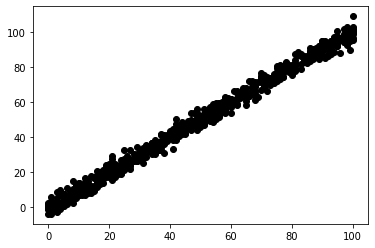

In [ ]:
X = np.array(df_train['x']).reshape(-1,1)
print(X.shape)
y = np.array(df_train['y'])

plt.scatter(X.T, y, color="black")

In [ ]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth = 10)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X,y)


X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

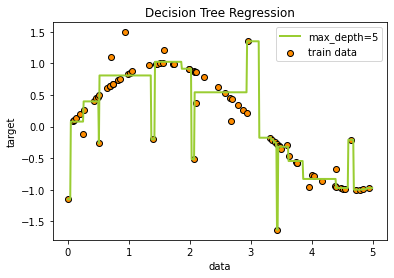

In [ ]:
plt.figure()

plt.scatter(X, y, edgecolor="black", c="darkorange", label="train data")
#plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
#plt.plot(X_test, y_3, color='red',label='max_depth=10', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
from sklearn import tree
x=tree.export_text(regr_1)
print(x)

|--- feature_0 <= 3.13
|   |--- feature_0 <= 0.51
|   |   |--- value: [0.05]
|   |--- feature_0 >  0.51
|   |   |--- value: [0.71]
|--- feature_0 >  3.13
|   |--- feature_0 <= 3.85
|   |   |--- value: [-0.45]
|   |--- feature_0 >  3.85
|   |   |--- value: [-0.87]



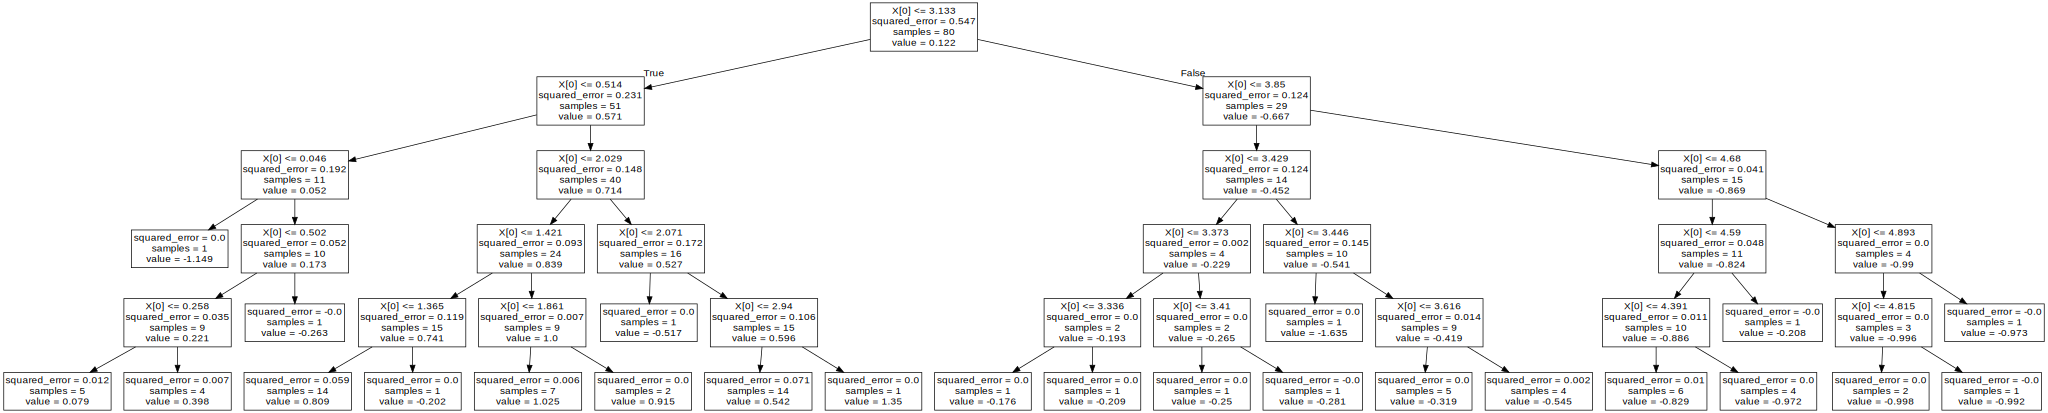

<Figure size 1080x720 with 0 Axes>

In [ ]:
import graphviz
plt.figure(figsize=(15,10))

y = tree.export_graphviz(regr_2)
graph = graphviz.Source(y, format="png") 
graph